Загрузка данных.
Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [26]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/netflix_users_data.csv')

df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


Приведение столбцов к стилю camel_case

In [27]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split('_')
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]

print(df.columns)

Index(['user id', 'subscription type', 'monthly revenue', 'join date',
       'last payment date', 'country', 'age', 'gender', 'device',
       'plan duration'],
      dtype='object')


Приведение типов данных

In [31]:
# Приведение столбцов к типу datetime с обработкой ошибок

df['join date'] = pd.to_datetime(df['join date'], errors='coerce')
df['last payment date'] = pd.to_datetime(df['last payment date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transactionid            1048567 non-null  object        
 1   customerid               1048567 non-null  object        
 2   customerdob              987831 non-null   datetime64[ns]
 3   custgender               1047467 non-null  object        
 4   custlocation             1048416 non-null  object        
 5   custaccountbalance       1046198 non-null  float64       
 6   transactiondate          1048567 non-null  object        
 7   transactiontime          1048567 non-null  int64         
 8   transactionamount (inr)  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 72.0+ MB


Выполняем предобработку данных.
- Избавляемся от выбросов

In [33]:
# Удаление выбросов в 'monthly revenue' с использованием IQR
Q1 = df['monthly revenue'].quantile(0.25)
Q3 = df['monthly revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['monthly revenue'] >= lower_bound) & (df['monthly revenue'] <= upper_bound)]
# Выводим очищенные данные
print(df)

      user id subscription type  monthly revenue  join date last payment date  \
0           1             Basic               10 2022-01-15        2023-10-06   
1           2           Premium               15 2021-05-09        2023-06-22   
2           3          Standard               12 2023-02-28        2023-06-27   
3           4          Standard               12 2022-10-07        2023-06-26   
4           5             Basic               10 2023-01-05        2023-06-28   
...       ...               ...              ...        ...               ...   
2495     2496           Premium               14 2022-07-25        2023-12-07   
2496     2497             Basic               15 2022-04-08        2023-07-14   
2497     2498          Standard               12 2022-09-08        2023-07-15   
2498     2499          Standard               13 2022-12-08        2023-12-07   
2499     2500             Basic               15 2022-08-13        2023-12-07   

             country  age  

Поиск дублей и пропусков в данных
- Избавляемся от пропусков

In [34]:
# Удаление дубликатов
df = df.drop_duplicates()

# Удаление строк с пропусками
df = df.dropna()

Исследовательский анализ данных

Находим количество уникальных пользователей

In [35]:
# Находим количество уникальных клиентов по 'customerid'
unique_customers_count = df['user id'].nunique()

print(unique_customers_count)

2500


Вывод: Количество уникальных пользователей 2500

Изучаем возраст пользователей и визуализируем

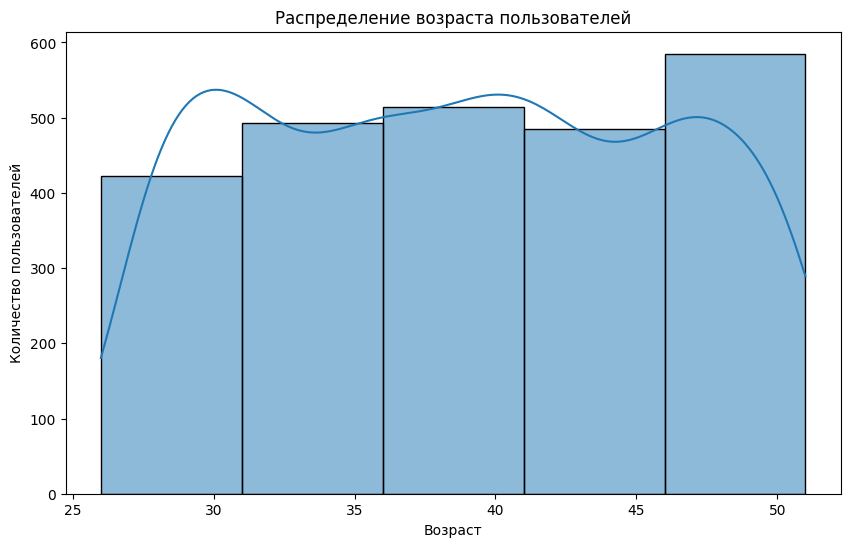

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Изучение возраста пользователей
age_description = df['age'].describe()

# Визуализация распределения возраста
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=5, kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Вывод: Минимальное количество пользователей 420 в возрастной группе 25-30 лет, максимальное 580 в 45-50 лет, в остальных группах примерно равное около 500.

Изучаем пол пользователей и визуализируем

<ipython-input-42-ac1e2b0a35c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


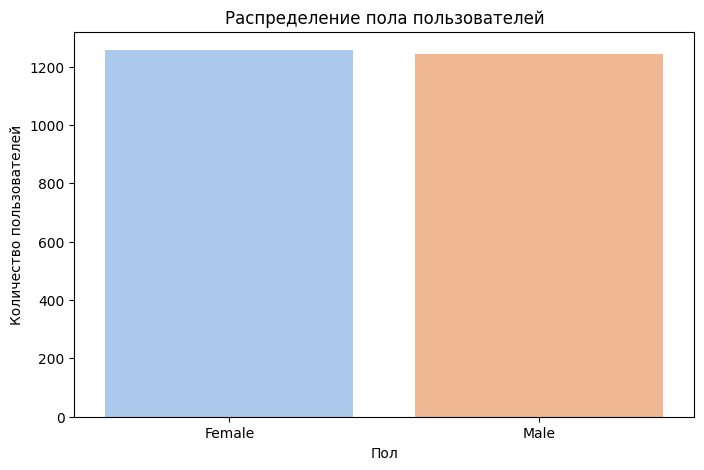

In [42]:
# Изучение пола пользователей
gender_counts = df['gender'].value_counts()

# Визуализация распределения пола
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Распределение пола пользователей')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.show()

Вывод: Количество мужчин и женщин среди пользователей примерно поровну

Изучаем девайсы пользователей и визуализируем

<ipython-input-43-9978d26d1116>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')


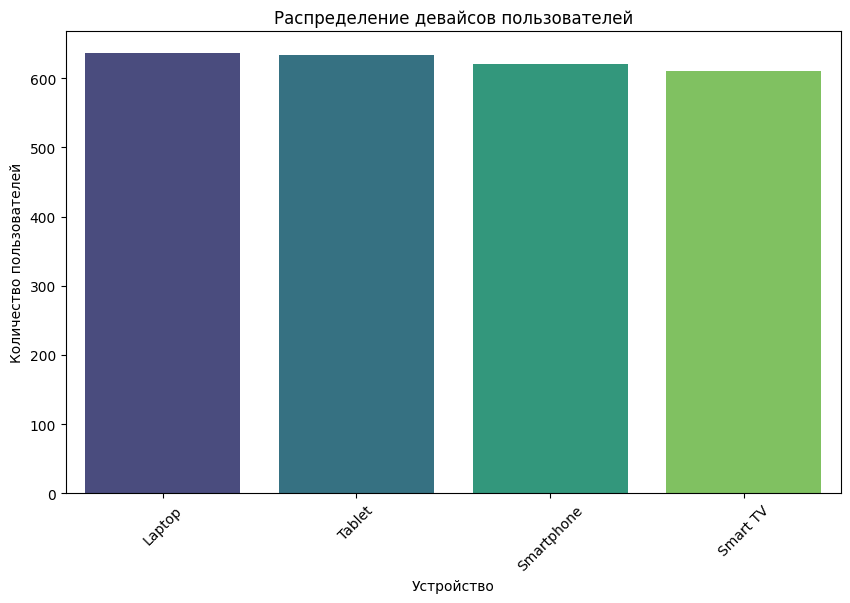

In [43]:
# Изучение девайсов пользователей
device_counts = df['device'].value_counts()

# Визуализация распределения девайсов
plt.figure(figsize=(10, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')
plt.title('Распределение девайсов пользователей')
plt.xlabel('Устройство')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

Вывод: пользователи используют всего 4 вида девайсов примерно в равных пропорциях

Изучаем тип подписки пользователей и визуализируем

<ipython-input-44-5be9fd4aa28a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette='crest')


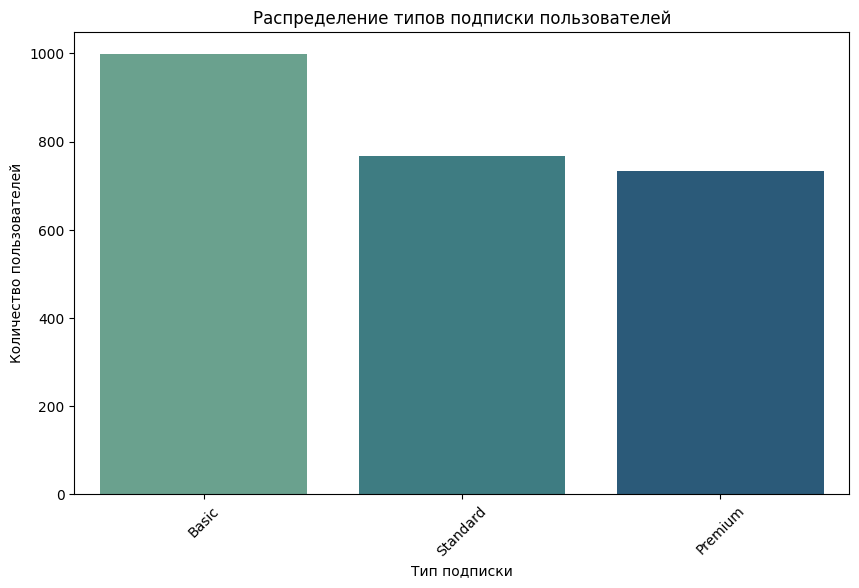

In [44]:
# Изучение типов подписки пользователей
subscription_counts = df['subscription type'].value_counts()

# Визуализация распределения типов подписки
plt.figure(figsize=(10, 6))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette='crest')
plt.title('Распределение типов подписки пользователей')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

Выводы: Тип подписки Базовый популярнее Стандарта и Премиума примерно на 20% и 25% соответственно.

Изучаем локацию пользователей и визуализируем

<ipython-input-45-4a38fe7574ea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='cividis')


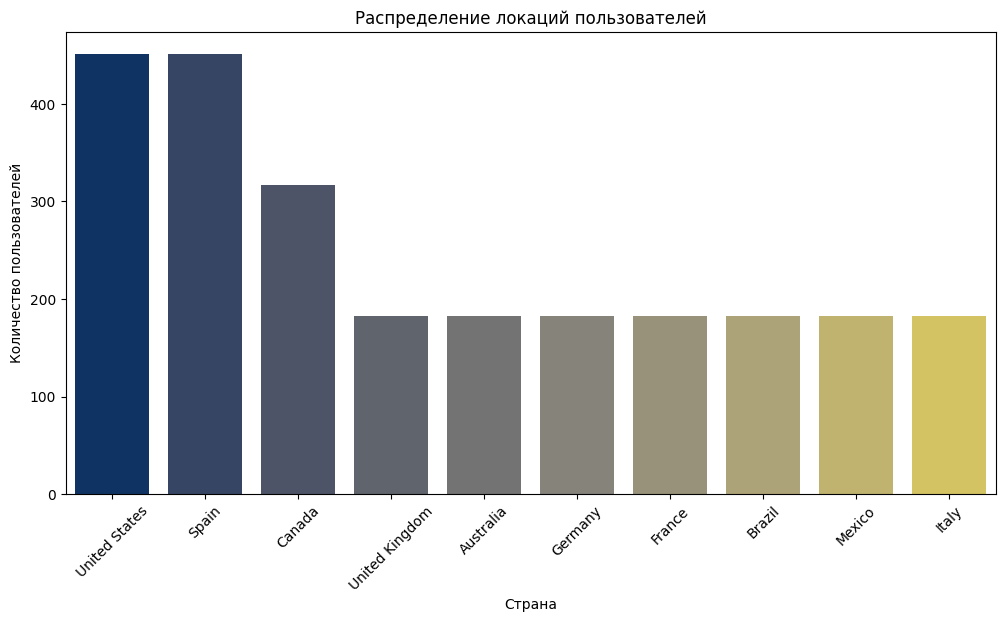

In [45]:
# Изучение локации пользователей
country_counts = df['country'].value_counts()

# Визуализация распределения локаций
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='cividis')
plt.title('Распределение локаций пользователей')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

Вывод: Максимальное количество пользователей (более 450) в США и Испании на третьм месте Канада около 300.

Изучаем динамику привлечения пользователей (Join Date)

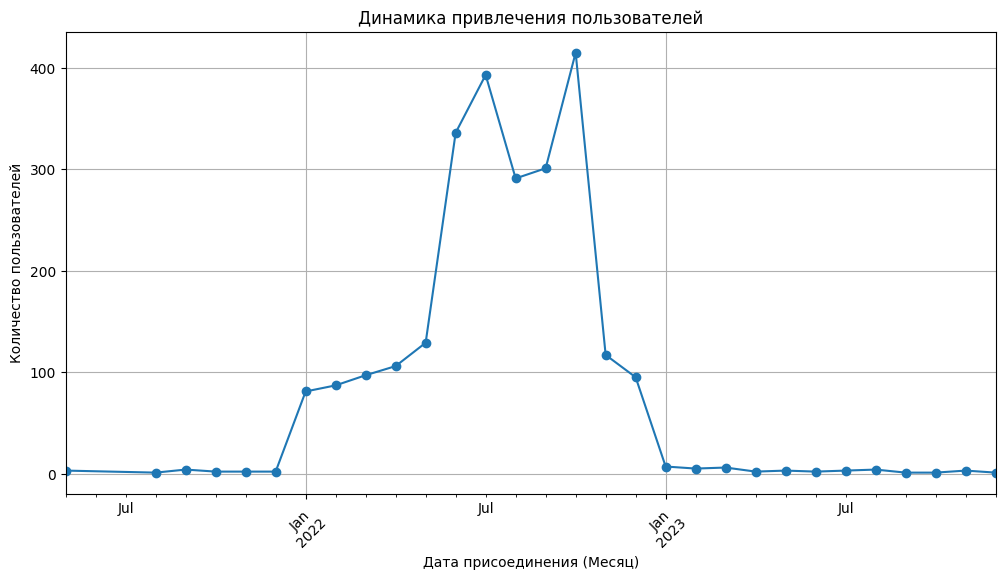

In [46]:
# Группировка по дате присоединения и подсчет пользователей
df['join date'] = pd.to_datetime(df['join date'], errors='coerce')
join_counts = df['join date'].dt.to_period('M').value_counts().sort_index()

# Визуализация динамики привлечения пользователей
plt.figure(figsize=(12, 6))
join_counts.plot(kind='line', marker='o')
plt.title('Динамика привлечения пользователей')
plt.xlabel('Дата присоединения (Месяц)')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Вывод: Почти 100% пользователей пришло в течении 2022 года, максимальный приток с мая по сентябрь.

Изучаем динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

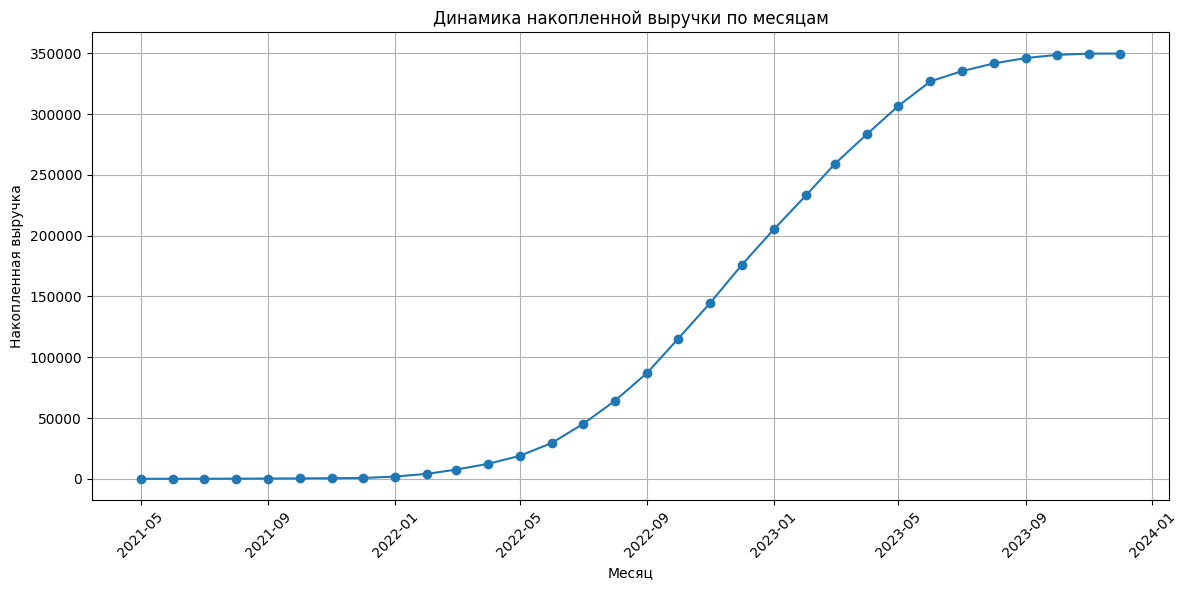

In [50]:
# Создать временной ряд по месяцам
df['month'] = df['join date'].dt.to_period('M')

# Создать DataFrame для накопленной выручки
revenue_data = []

# Для каждой записи, добавить накопленную выручку для каждого месяца
for index, row in df.iterrows():
    current_date = row['join date']
    end_date = row['last payment date']
    while current_date <= end_date:
        revenue_data.append({
            'month': current_date.to_period('M'),
            'monthly_revenue': row['monthly revenue']
        })
        current_date += pd.DateOffset(months=1)

# Создать новый DataFrame с накопленной выручкой
revenue_df = pd.DataFrame(revenue_data)

# Группировка и накопление выручки
revenue_df = revenue_df.groupby('month').sum().reset_index()
revenue_df['cumulative_revenue'] = revenue_df['monthly_revenue'].cumsum()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(revenue_df['month'].dt.to_timestamp(), revenue_df['cumulative_revenue'], marker='o')
plt.title('Динамика накопленной выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Накопленная выручка')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Вывод: В период с начала 2022 по конец 2023 год выручка сервиса выросла до 350000. Наиболее активный рост зафиксировани с мая 2022 по май 2023.

Разобьём клиентов на корзины по возрасту и определим самую платежеспособную группу

In [51]:
# Определить корзины по возрасту
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Возрастные группы
labels = ['18 и младше', '19-25', '26-35', '36-45', '46-55', '56-65', '66 и старше']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Группировка по возрастным группам и подсчет общей выручки
age_revenue = df.groupby('age_group')['monthly revenue'].sum().reset_index()

# Определить самую платежеспособную группу
most_profitable_group = age_revenue.loc[age_revenue['monthly revenue'].idxmax()]

print(most_profitable_group)

age_group          36-45
monthly revenue    12707
Name: 3, dtype: object


<ipython-input-51-0df4f4f18026>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = df.groupby('age_group')['monthly revenue'].sum().reset_index()


<ipython-input-54-c2c597e12309>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')


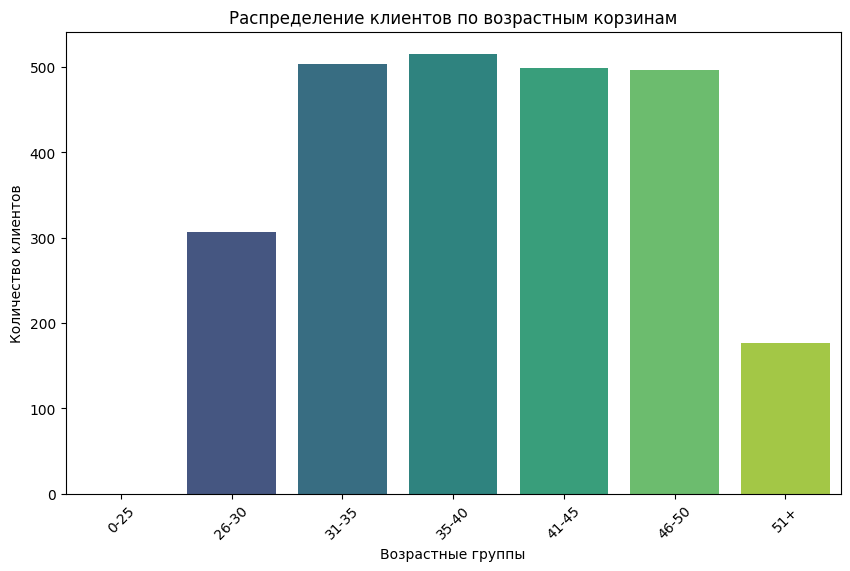

In [54]:
# Определяем границы корзин
bins = [0, 25, 30, 35, 40, 45, 50, 55]
labels = ['0-25', '26-30', '31-35', '35-40', '41-45', '46-50', '51+']

# Создаем новый столбец с корзинами по возрасту
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Считаем количество клиентов в каждой корзине
age_distribution = df['age_group'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')
plt.title('Распределение клиентов по возрастным корзинам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()

Вывод: Около 80% всей выручки приносят пользователи в возрасте 31-50 лет. Максимум приходится на группу 35-40 лет.

Расссмотрим зависимость типа тарифа от группы возраста пользователя

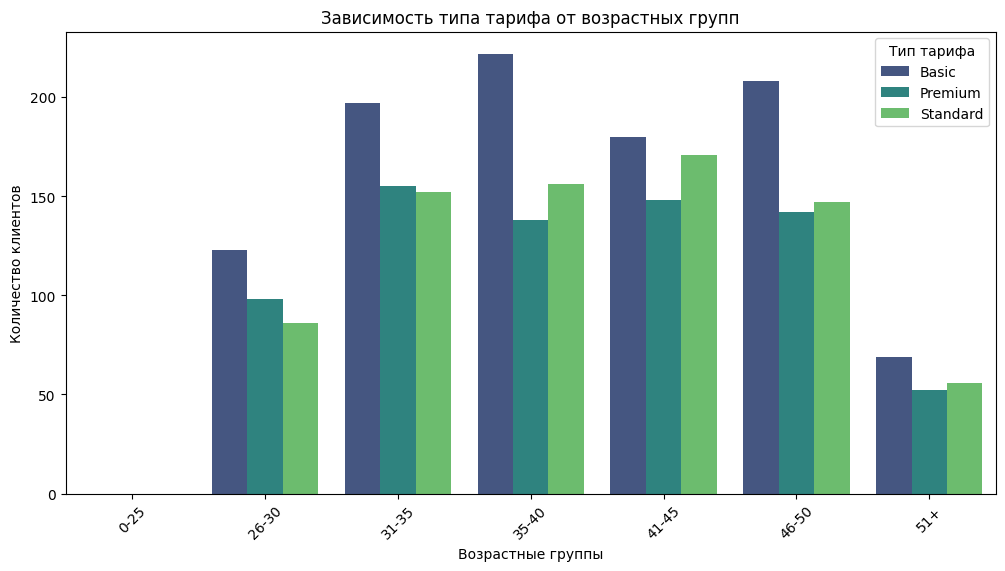

In [56]:
# Определяем границы корзин
bins = [0, 25, 30, 35, 40, 45, 50, 55]
labels = ['0-25', '26-30', '31-35', '35-40', '41-45', '46-50', '51+']

# Создаем новый столбец с корзинами по возрасту
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Визуализация зависимости типа тарифа от группы возраста
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_group', hue='subscription type', palette='viridis')
plt.title('Зависимость типа тарифа от возрастных групп')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество клиентов')
plt.legend(title='Тип тарифа')
plt.xticks(rotation=45)
plt.show()

Вывод: Максимум пользователей в абсолютных цифрах тариф Базовый выбирают группа 35-40 лет, тариф Премиум группа 31-35 лет, тариф Стандарт группа 41-45 лет.

Рассмотрим зависимость типа тарифа от страны пользователя

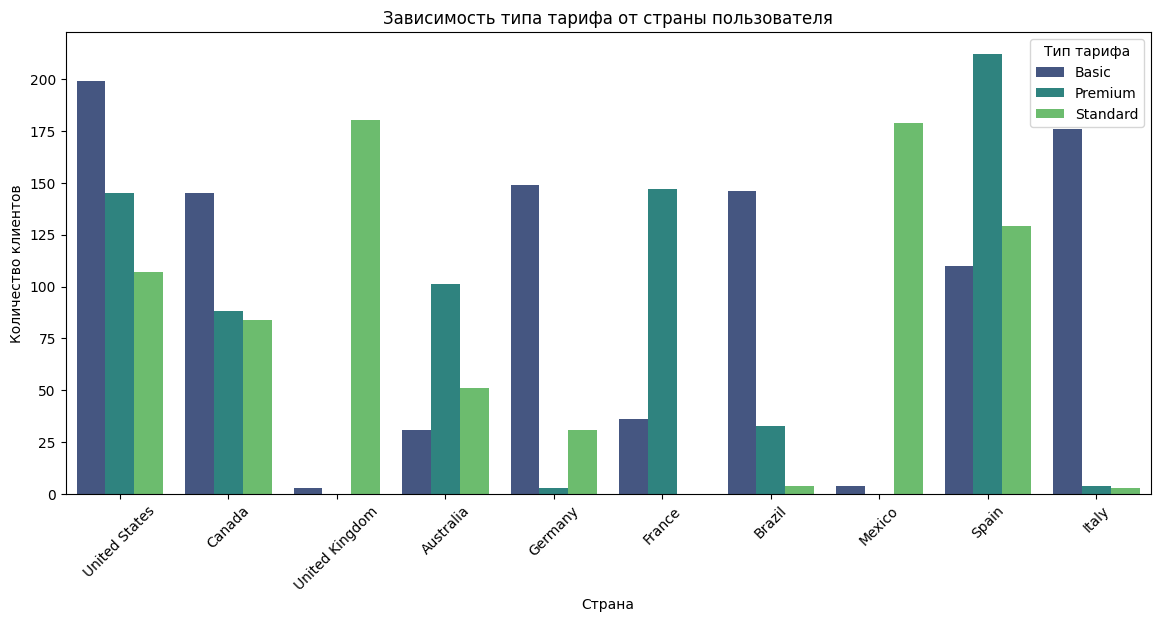

In [57]:
# Визуализация зависимости типа тарифа от страны
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='country', hue='subscription type', palette='viridis')
plt.title('Зависимость типа тарифа от страны пользователя')
plt.xlabel('Страна')
plt.ylabel('Количество клиентов')
plt.legend(title='Тип тарифа')
plt.xticks(rotation=45)
plt.show()

Вывод: Максимум пользователей в абсолютных цифрах тариф Базовый выбирают в США, тариф Премиум в Испании, тариф Стандарт в Англии.

ВЫВОДЫ В ФОРМАТЕ НУМИРОВАННОГО СПИСКА
1. Количество уникальных пользователей 2500
2. Минимальное количество пользователей 420 в возрастной группе 25-30 лет, максимальное 580 в 45-50 лет, в остальных группах примерно равное около 500.
3. Количество мужчин и женщин среди пользователей примерно поровну
4. Пользователи используют всего 4 вида девайсов примерно в равных пропорциях
5. Тип подписки Базовый популярнее Стандарта и Премиума примерно на 20% и 25% соответственно.
6. Максимальное количество пользователей (более 450) в США и Испании на третьм месте Канада около 300.
7. Почти 100% пользователей пришло в течении 2022 года, максимальный приток с мая по сентябрь.
8. В период с начала 2022 по конец 2023 год выручка сервиса выросла до 350000. Наиболее активный рост зафиксировани с мая 2022 по май 2023.
9. Около 80% всей выручки приносят пользователи в возрасте 31-50 лет. Максимум приходится на группу 35-40 лет.
10. Максимум пользователей в абсолютных цифрах тариф Базовый выбирают группа 35-40 лет, тариф Премиум группа 31-35 лет, тариф Стандарт группа 41-45 лет.
11. Максимум пользователей в абсолютных цифрах тариф Базовый выбирают в США, тариф Премиум в Испании, тариф Стандарт в Англии.